In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [27]:
RERUN = False


In [46]:
plt.style.use('default')
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

In [4]:
workpath = os.getcwd()
dbpath = '/home/idies/workspace/lsst_cadence/FBS_1.5/'
# dbpath = '/home/idies/workspace/lsst_cadence/FBS_1.4/'

In [7]:
#  get columns from databases
def get_cols(dbfile, cols='night', lim=None):
    """
    cols = 'night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note'
    connect to database
    Returns: a pandas DataFrame
    
    Examples:
    
    cols = 'night, observationStartMJD, fieldRA, filter, fieldDec, proposalId, note, '

    df = get_cols(dbfile=dbpath + db, cols=cols, lim='night<300')
   
    """
    import sqlite3
    import pandas as pd
    connection = sqlite3.connect(dbfile)
    cursor = connection.cursor()
    
    if lim!=None:
        sqlstr = "SELECT {} FROM SummaryAllProps where {}".format(cols, lim)
    else:
        sqlstr = "SELECT {} FROM SummaryAllProps".format(cols)

    print('connect to ', dbfile, '\n', sqlstr)
    cursor.execute(sqlstr)
    data = cursor.fetchall()
    
    # convert data to dataframe
    data_df = pd.DataFrame(data, columns=cols.split(', '))
    
    # close connection
    connection.close()
    
    return data_df


In [6]:
dblist_all

['agnddf_v1.5_10yrs.db',
 'alt_dust_v1.5_10yrs.db',
 'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db',
 'baseline_2snaps_v1.5_10yrs.db',
 'baseline_samefilt_v1.5_10yrs.db',
 'baseline_v1.5_10yrs.db',
 'bulges_bs_v1.5_10yrs.db',
 'bulges_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_bs_v1.5_10yrs.db',
 'bulges_cadence_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_i_heavy_v1.5_10yrs.db',
 'bulges_i_heavy_v1.5_10yrs.db',
 'daily_ddf_v1.5_10yrs.db',
 'dcr_nham1_ug_v1.5_10yrs.db',
 'dcr_nham1_ugr_v1.5_10yrs.db',
 'dcr_nham1_ugri_v1.5_10yrs.db',
 'dcr_nham2_ug_v1.5_10yrs.db',
 'dcr_nham2_ugr_v1.5_10yrs.db',
 'dcr_nham2_ugri_v1.5_10yrs.db',
 'descddf_v1.5_10yrs.db',
 'filterdist_indx1_v1.5_10yrs.db',
 'filterdist_indx2_v1.5_10yrs.db',
 'filterdist_indx3_v1.5_10yrs.db',
 'filterdist_indx4_v1.5_10yrs.db',
 'filterdist_indx5_v1.5_10yrs.db',
 'filterdist_indx6_v1.5_10yrs.db',
 'filterdist_indx7_v1.5_10yrs.db',
 'filterdist_indx8_v1.5_10yrs.db',
 'footprint_add_mag_cloudsv1.5_10yrs.db',
 'footprint_big_sky_d

In [51]:
# %matplotlib inline
#plt.rcParams['font.size'] = 10

def plot_maghist(df_list, label_list, var='fiveSigmaDepth', 
                 ylim=[0, 65000], yticks=[]):

    
  
    """plot histogram for each filter"""
    bins = np.arange(18, 27, 0.1)
    xs = (bins[:-1] + bins[1:]) * 0.5
    bright = xs < 21
    faint = xs >= 21
    fig, axs = plt.subplots(6, 1, figsize=(6, 15), 
                            sharex='col', sharey='row',
                            gridspec_kw={'hspace': 0, 'wspace': 0}); 

    axs = axs.flatten()
    FILTERS = ['u', 'g', 'r', 'i', 'z', 'y']

    mag_min = {'u':23.4, 'g':24.6, 'r':24.3, 'i':23.6, 'z':22.9, 'y':21.7 }
    mag_stretch = {'u':24.0, 'g':25.1, 'r':24.8, 'i':24.1, 'z':23.4, 'y':22.2 }
    mag_goal = {'u':23.9, 'g':25.0, 'r': 24.7, 'i': 24.0, 'z': 23.3, 'y': 22.1}
    
    cmap = plt.cm.get_cmap('plasma')
    colors = [cmap(i) for i in np.linspace(0, 1, len(df_list)+1)][:len(df_list)]
    for i, f in enumerate(FILTERS):
        ax = axs[i]
        print (f)
        for k in range(2):
            #plotting the edges and the inside of the bins separately
            data_stacked = np.array([df[df['filter']==f][var].values for df in df_list])
            if k:
                #edges
                _tmp = ax.hist(data_stacked, histtype='step', 
                               stacked=False, linewidth=2, label=label_list, 
                                bins=bins, alpha=0.65, color=colors);
                dist = {}
                for l,lab in enumerate(label_list):
                    dist[lab] = _tmp[0][l]
                    
                    print(f, lab)
                    peaks = xs[bright][np.where(dist[lab][bright] == 
                                                      dist[lab][bright].max())[0]]
                    if len(peaks) <= 2:
                        print("\t bright", peaks, dist[lab][bright].max())
                    peaks = xs[faint][np.where(dist[lab][faint] == 
                                                       dist[lab][faint].max())[0]]
                    if len(peaks) <= 2:
                        print("\t faint", peaks, dist[lab][faint].max())
                '''print(f, "lowM", xs[lowm][np.where(dist[lowm] == dist[lowm].max())[0]], 
                      dist[lowm].max())
                print(f, "highM", xs[highm][np.where(dist[highm] == dist[highm].max())[0]], 
                      dist[highm].max())
                      '''
            else:
                #filled bins
                ax.hist(data_stacked[0],  
                        stacked=False, linewidth=2, #edgewidth=2,
                        bins=bins, histtype="stepfilled", 
                        label=None, color=colors[0],  alpha=0.2);
 
        ax.set_xlabel('fiveSigmaDepth', fontsize=18)
        ax.set_ylabel('Nv (k)', fontsize=18)
        ax.set_title(f, position=(0.95, 0.7), fontsize=18)
        ax.set_xlim([19, 26])
      
        ax.set_xticks(np.arange(19, 26, 1))
        ax.set_xticklabels(labels=["%i"%k for k in np.arange(19, 26, 1)],
                     fontsize=18)
        
        ax.set_ylim(ylim)
        ax.set_yticks(yticks)
        

        
        ax.set_yticklabels(labels=["%i"%(k/10000) for k in yticks],
                      fontsize=18)
        ax.yaxis.get_offset_text().set_visible(False)
        
        # fill mag from science require document
        y = np.linspace(0, ylim[1])
        ax.fill_betweenx(y, mag_min[f], mag_stretch[f], 
                         color='gray', alpha=0.2)
        ax.axvline(mag_goal[f],color='k') 
        
    # add shared legend for all subplots 
    lines = []
    labels = []
    
    for ax in fig.axes[:1]:
        axLine, axLabel = ax.get_legend_handles_labels()
        lines.extend(axLine)
        labels.extend(axLabel)
        ax.set_ylim(ylim)
    fig.legend(lines, labels,           
               loc = 'upper left', bbox_to_anchor=(0.1, 0.95))
        
    fig.tight_layout()
    
    

In [15]:
def get_pixId(df, nside=16):
    '''get pixId for each field'''
    pixId = RADec2pix(nside, ra=df['fieldRA'].values, dec=df['fieldDec'].values)
    df['pixId'] = pixId
    return df


def RADec2pix(nside, ra, dec, degree=True):
    """
    Calculate the nearest healpixel ID of an RA/Dec array, assuming nside.

    Parameters
    ----------
    nside : int
        The nside value of the healpix grid.
    ra : numpy.ndarray
        The RA values to be converted to healpix ids, in degree by default.
    dec : numpy.ndarray
        The Dec values to be converted to healpix ids, in degree by default.

    Returns
    -------
    numpy.ndarray
        The healpix ids.
    """
    import healpy as hp
    if degree:
        ra = np.radians(ra) # change to radians
        dec = np.radians(dec)
    
    lat = np.pi/2. - dec
    hpid = hp.ang2pix(nside, lat, ra )
    return hpid


In [32]:
# get the name of all opsim dbs 
import glob
    
os.chdir(dbpath)  # change to opsim database directory
dblist_all = glob.glob('*.db') 
# workpath = '/home/idies/workspace/Storage/lixl/persistent/LSST_OpSim/unknowns'
os.chdir(workpath) # change back to work directory
dblist_all.sort()


### WFD

In [8]:
if RERUN:
    %%time
    # calculate the FoM of depth
    # 1 - (peak - mag_stretch)
    sqlstr = 'proposalId=1'

    mag_stretch = {'u':24.0, 'g':25.1, 'r':24.8, 'i':24.1, 'z':23.4, 'y':22.2 }
    bins = np.arange(18, 27, 0.01)

    dicFoM = {}

    filters = ['u', 'g', 'r', 'i', 'z', 'y']
    for i, dbname in enumerate( dblist_all):
        df_opsim = get_cols(dbfile=dbpath+dbname,
                   cols='filter, fiveSigmaDepth, night', lim=sqlstr)
        dicFoM[dbname] = {}
        for f in filters:
            m5 = df_opsim [df_opsim['filter']==f]['fiveSigmaDepth'].values
            # method to calculate figure of merit of depth from fiveSigmaDepth
            #values, bins, = np.histogram(m5, bins=bins) 
            #mode = bins[ np.argmax(values) ]
            # 
            mode = np.median(m5)
        
            #FoM =  mode - mag_stretch[f]
            FoM = mode
            #FoM = np.mean(m5)
        
            dicFoM[dbname][f] = FoM
            print(dbname, f, FoM)
    df = pd.DataFrame( dicFoM ).T
    df = df.reset_index()
    df = df.rename(columns = {'index':'db'})
    df.to_csv('data/depthFoM_mag_v1.5.csv', index=False)


connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/agnddf_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1
agnddf_v1.5_10yrs.db u 23.596546835929928
agnddf_v1.5_10yrs.db g 24.553977862122142
agnddf_v1.5_10yrs.db r 24.06381571094485
agnddf_v1.5_10yrs.db i 23.479031220196212
agnddf_v1.5_10yrs.db z 22.802752876109977
agnddf_v1.5_10yrs.db y 22.030345388505168
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/alt_dust_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1
alt_dust_v1.5_10yrs.db u 23.552836710528087
alt_dust_v1.5_10yrs.db g 24.514700938296542
alt_dust_v1.5_10yrs.db r 24.009913216028956
alt_dust_v1.5_10yrs.db i 23.41863139915747
alt_dust_v1.5_10yrs.db z 22.746577053651045
alt_dust_v1.5_10yrs.db y 21.973123561257253
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=

KeyboardInterrupt: 

In [35]:
pwd

'/home/idies/workspace/Storage/fbianco/persistent/LSSTunknowns/timeGaps'

In [28]:
# read in the dataframe 
if not RERUN:
    df = pd.read_csv('data/depthFoM_mag_v1.5.csv')


In [29]:
df.head()

,db,g,i,r,u,y,z
0,agnddf_v1.5_10yrs.db,24.553978,23.479031,24.063816,23.596547,22.030345,22.802753
1,alt_dust_v1.5_10yrs.db,24.514701,23.418631,24.009913,23.552837,21.973124,22.746577


In [31]:
dblist_all

['agnddf_v1.5_10yrs.db',
 'alt_dust_v1.5_10yrs.db',
 'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db',
 'baseline_2snaps_v1.5_10yrs.db',
 'baseline_samefilt_v1.5_10yrs.db',
 'baseline_v1.5_10yrs.db',
 'bulges_bs_v1.5_10yrs.db',
 'bulges_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_bs_v1.5_10yrs.db',
 'bulges_cadence_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_i_heavy_v1.5_10yrs.db',
 'bulges_i_heavy_v1.5_10yrs.db',
 'daily_ddf_v1.5_10yrs.db',
 'dcr_nham1_ug_v1.5_10yrs.db',
 'dcr_nham1_ugr_v1.5_10yrs.db',
 'dcr_nham1_ugri_v1.5_10yrs.db',
 'dcr_nham2_ug_v1.5_10yrs.db',
 'dcr_nham2_ugr_v1.5_10yrs.db',
 'dcr_nham2_ugri_v1.5_10yrs.db',
 'descddf_v1.5_10yrs.db',
 'filterdist_indx1_v1.5_10yrs.db',
 'filterdist_indx2_v1.5_10yrs.db',
 'filterdist_indx3_v1.5_10yrs.db',
 'filterdist_indx4_v1.5_10yrs.db',
 'filterdist_indx5_v1.5_10yrs.db',
 'filterdist_indx6_v1.5_10yrs.db',
 'filterdist_indx7_v1.5_10yrs.db',
 'filterdist_indx8_v1.5_10yrs.db',
 'footprint_add_mag_cloudsv1.5_10yrs.db',
 'footprint_big_sky_d

In [33]:
df_base = get_cols(dbfile=dbpath+dblist_all[4], 
                   cols='filter, fiveSigmaDepth, night', 
                   lim='proposalId=1')
df_short = get_cols(dbfile=dbpath+'short_exp_2ns_1expt_v1.5_10yrs.db',
                    cols='filter, fiveSigmaDepth, night', 
                   lim='proposalId=1')
df_twilight = get_cols(dbfile=dbpath+'twilight_neo_mod1_v1.5_10yrs.db',
                    cols='filter, fiveSigmaDepth, night', 
                   lim='proposalId=1') 


connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/baseline_samefilt_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/short_exp_2ns_1expt_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/twilight_neo_mod1_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1


u
u baseline
	 faint [23.65] 17845.0
u short_2ns
	 bright [20.45] 5410.0
	 faint [23.65] 12452.0
u twilight_neo
	 bright [20.95] 3.0
	 faint [23.65] 15655.0
g
g baseline
	 faint [24.65] 20821.0
g short_2ns
	 bright [20.95] 235.0
	 faint [24.65] 19498.0
g twilight_neo
	 faint [24.65] 25773.0
r
r baseline
	 faint [24.05] 50157.0
r short_2ns
	 bright [20.95] 928.0
	 faint [24.15] 53990.0
r twilight_neo
	 bright [20.95] 17319.0
	 faint [24.15] 39531.0
i
i baseline
	 faint [23.65] 45980.0
i short_2ns
	 bright [20.95] 3785.0
	 faint [23.65] 43470.0
i twilight_neo
	 bright [20.85] 17616.0
	 faint [23.65] 33563.0
z
z baseline
	 bright [20.95] 17.0
	 faint [22.75] 45124.0
z short_2ns
	 bright [20.75] 5498.0
	 faint [22.85] 42436.0
z twilight_neo
	 bright [20.25] 20085.0
	 faint [22.85] 30382.0
y
y baseline
	 bright [20.95] 1076.0
	 faint [22.15] 47615.0
y short_2ns
	 bright [19.95] 5643.0
	 faint [22.05] 50169.0
y twilight_neo
	 bright [20.95] 1884.0
	 faint [22.05] 61488.0


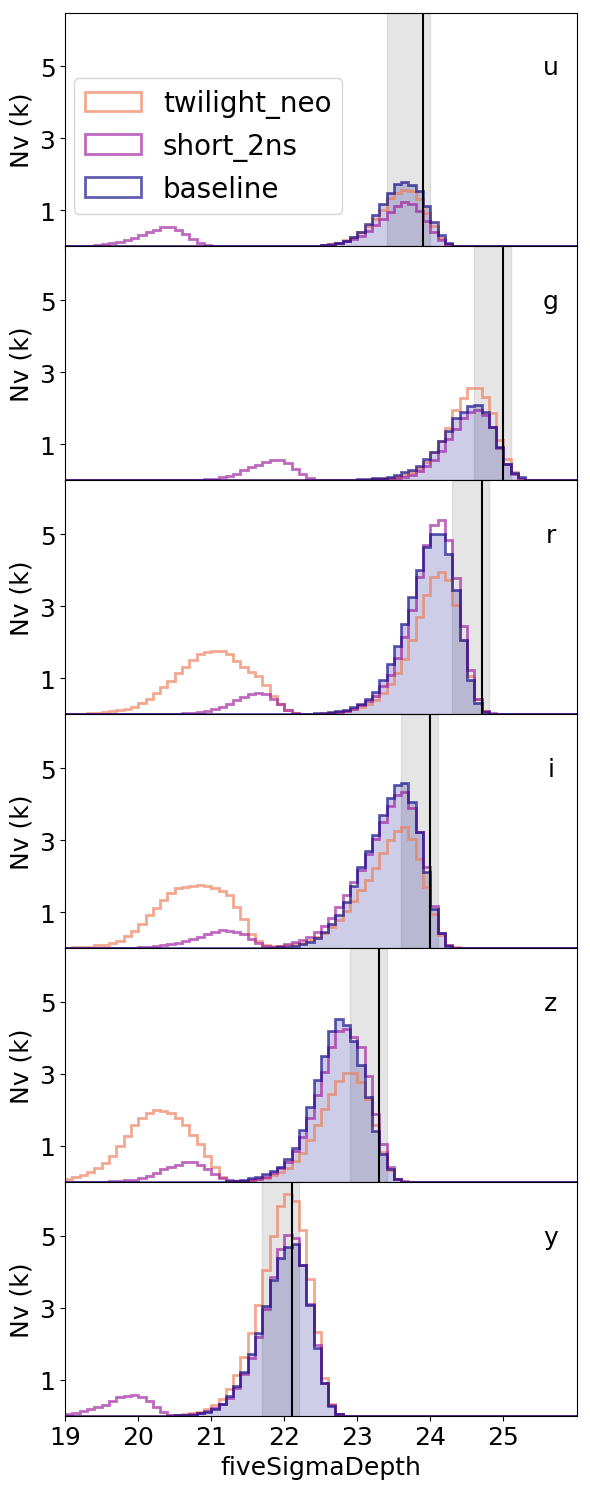

In [52]:
df_list = [df_base,  df_short, df_twilight]
label_list = ['baseline', 'short_2ns', 'twilight_neo']
plot_maghist(df_list, label_list, ylim=[0, 65000], yticks=range(10000, 60000, 20000))


### GP

In [16]:
if RERUN:
    ipix_LMC = [2899, 2900, 2901, 2934, 2935, 2936, 2965, 2966, 2967, 2992, 2993, 2994]
    ipix_SMC = [2960, 2961, 2988, 2989, 3012]
    ipix_GP = [ 144,  145,  146,  147,  179,  180,  181,  182,  183,  184,  217,
            218,  219,  225,  226,  260,  261,  271,  272,  307,  308,  320,
            321,  358,  374,  413,  431,  432,  471,  472,  493,  534,  535,
            558,  598,  599,  622,  661,  662,  687,  725,  726,  751,  788,
            789,  790,  815,  816,  852,  853,  854,  879,  915,  916,  917,
            944,  979,  980,  981, 1008, 1042, 1043, 1044, 1045, 1073, 1107,
           1108, 1109, 1136, 1170, 1171, 1172, 1201, 1234, 1235, 1236, 1237,
           1265, 1297, 1298, 1299, 1300, 1330, 1361, 1362, 1363, 1364, 1393,
           1425, 1426, 1427, 1428, 1458, 1489, 1490, 1491, 1492, 1522, 1552,
           1553, 1554, 1555, 1587, 1616, 1617, 1618, 1619, 1620, 1650, 1679,
           1680, 1681, 1682, 1683, 1715, 1744, 1745, 1746, 1747, 1779, 1807,
           1808, 1809, 1810, 1811, 1843, 1871, 1872, 1873, 1874, 1875, 1907,
           1934, 1935, 1936, 1937, 1938, 1972, 1998, 1999, 2000, 2001, 2002,
           2003, 2036, 2062, 2063, 2064, 2065, 2066, 2100, 2126, 2127, 2128,
           2129, 2130, 2164, 2189, 2190, 2191, 2192, 2193, 2194, 2229, 2253,
           2254, 2255, 2256, 2257, 2258, 2293, 2316, 2317, 2318, 2319, 2320,
           2321, 2358, 2380, 2381, 2382, 2383, 2384, 2385, 2421, 2422, 2443,
           2444, 2445, 2446, 2447, 2448, 2449, 2486, 2487, 2507, 2508, 2509,
           2510, 2511, 2512, 2513, 2550, 2551, 2570, 2571, 2572, 2573, 2574,
           2575, 2576, 2614, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2673,
           2687, 2688, 2689, 2690, 2691, 2692, 2693, 2728, 2729, 2739, 2740,
           2741, 2742, 2743, 2744, 2745, 2746, 2779, 2780, 2781, 2787, 2788,
           2789, 2790, 2791, 2792, 2793, 2794, 2826, 2827, 2828, 2829, 2830,
           2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2869, 2870,
           2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2908, 2909,
           2910, 2911, 2912, 2913, 2914, 2915, 2916, 2943, 2944, 2945, 2946,
           2947, 2948, 2974, 2975, 2976]

    dbname = dblist_all[5]
    sqlstr = None
    ipix_ms = ipix_SMC


In [ ]:
if RERUN:
    %%time
    # calculate the FoM of depth
    # 1 - (peak - mag_stretch)
    sqlstr = None

    mag_stretch = {'u':24.0, 'g':25.1, 'r':24.8, 'i':24.1, 'z':23.4, 'y':22.2 }
    bins = np.arange(18, 27, 0.01)

    dicFoM = {}

    filters = ['u', 'g', 'r', 'i', 'z', 'y']

    ms = "GP"
    ipix_ms = ipix_GP

    for ms, ipix_ms in zip(["GP", "LMC", "SMC"], (ipix_GP, ipix_LMC, ipix_SMC)):
        for i, dbname in enumerate( dblist_all):
            df_opsim = get_cols(dbfile=dbpath+dbname,
                       cols='fieldRA, fieldDec, filter, fiveSigmaDepth, night', lim=sqlstr)

            df_opsim = get_pixId(df_opsim, nside=16)

            idx = np.isin(df_opsim['pixId'].values, ipix_ms)

            df_opsim_ms = df_opsim[idx]

            print( ms, len(ipix_ms), dbname, np.unique( df_opsim_ms['pixId'] ).shape )

            dicFoM[dbname] = {}
            for f in filters:


                m5 = df_opsim_ms [df_opsim_ms['filter']==f]['fiveSigmaDepth'].values
                # method to calculate figure of merit of depth from fiveSigmaDepth
                #values, bins, = np.histogram(m5, bins=bins) 
                #mode = bins[ np.argmax(values) ]
                # 

                mode = np.median(m5)

                #FoM =  mode - mag_stretch[f]
                FoM = mode
                #FoM = np.mean(m5)

                dicFoM[dbname][f] = FoM
                print(dbname, len(m5), f, FoM)

        df = pd.DataFrame( dicFoM ).T
        df = df.reset_index()
        df = df.rename(columns = {'index':'db'})
        df.to_csv('data/depthFoM_mag_{}_v1.5.csv'.format(ms), index=False)


In [18]:
ipix_SMC

[2960, 2961, 2988, 2989, 3012]

In [19]:
np.unique( df_opsim_ms['pixId'] )

NameError: name 'df_opsim_ms' is not defined